Loading the Datasets into the local dataframes

In [1]:
import pandas as pd
yield_data = pd.read_csv("C:\\Users\\nossa\\Downloads\\ML-DATASET\\yield.csv")
temp_data = pd.read_csv("C:\\Users\\nossa\\Downloads\\ML-DATASET\\temp.csv")
rainfall_data = pd.read_csv("C:\\Users\\nossa\\Downloads\\ML-DATASET\\rainfall.csv")
pesticides_data = pd.read_csv("C:\\Users\\nossa\\Downloads\\ML-DATASET\\pesticides.csv")

In [2]:
yield_data.head(7)

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400
5,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1966,1966,hg/ha,14400
6,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1967,1967,hg/ha,14144


Choosing only the required coloumns from the dataframe yield_data

In [3]:
needed = ['Area','Item','Year','Value']
yield_data = yield_data[needed]

In [4]:
temp_data.head(7)

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN
5,1854,Côte D'Ivoire,NaN
6,1855,Côte D'Ivoire,NaN


Replacing country with Area and year with Year in temp_data

In [5]:
temp_data.rename(columns = {'year':'Year','country':'Area'}, inplace = True)
temp_data.head(10)

,Year,Area,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN
5,1854,Côte D'Ivoire,NaN
6,1855,Côte D'Ivoire,NaN
7,1856,Côte D'Ivoire,26.28
8,1857,Côte D'Ivoire,25.17
9,1858,Côte D'Ivoire,25.49


In [6]:
rainfall_data.head(7)

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327
5,Afghanistan,1991,327
6,Afghanistan,1992,327


In [7]:
pesticides_data.head(7)

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.00
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.00
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.00
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.00
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.00
5,Pesticides Use,Albania,Use,Pesticides (total),1995,tonnes of active ingredients,251.00
6,Pesticides Use,Albania,Use,Pesticides (total),1996,tonnes of active ingredients,313.96


Considering only the required Classes from the data frame pestiides_data

In [8]:
needed = ['Area','Year','Value']
pesticides_data = pesticides_data[needed]

In [9]:
print("pesticides -- > ",pesticides_data.shape)
print("rainfall -- > ",rainfall_data.shape)
print("temp -- > ",temp_data.shape)
print("yield -- > ",yield_data.shape)

pesticides -- >  (4349, 3)
rainfall -- >  (6727, 3)
temp -- >  (71311, 3)
yield -- >  (56717, 4)


Merging the dataset based on the same coloumns

In [10]:
temp_data= temp_data[temp_data.Year >= 1961]
yield_final = pd.merge(yield_data,temp_data,on=['Year','Area'])
yield_final = pd.merge(yield_final,pesticides_data,on=['Year','Area'])
yield_final.rename(columns = {'Value_x':'Yield_Value','Value_y':'Pesticides_Value'}, inplace = True)
rainfall_data.rename(columns = {' Area':'Area'}, inplace = True)
yield_final = pd.merge(yield_final,rainfall_data,on=['Year','Area'])
yield_final.rename(columns = {'average_rain_fall_mm_per_year':'average_rain'}, inplace = True)

In [11]:
yield_final["average_rain"] = pd.to_numeric(yield_final["average_rain"], errors='coerce')

In [12]:
yield_final.shape

(28248, 7)

In [13]:
import pandas as pd

yield_final = yield_final.fillna(pd.NA)
nan_counts = yield_final.isna().sum()
print("NaN counts in each column:")
print(nan_counts)

NaN counts in each column:
Area                0
Item                0
Year                0
Yield_Value         0
avg_temp            0
Pesticides_Value    0
average_rain        6
dtype: int64


In [14]:
yield_final=yield_final.dropna()
yield_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28242 entries, 0 to 28247
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Area              28242 non-null  object 
 1   Item              28242 non-null  object 
 2   Year              28242 non-null  int64  
 3   Yield_Value       28242 non-null  int64  
 4   avg_temp          28242 non-null  float64
 5   Pesticides_Value  28242 non-null  float64
 6   average_rain      28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.7+ MB


In [15]:
yield_final.head(7)

,Area,Item,Year,Yield_Value,avg_temp,Pesticides_Value,average_rain
0,Albania,Maize,1990,36613,16.37,121.0,1485.0
1,Albania,Potatoes,1990,66667,16.37,121.0,1485.0
2,Albania,"Rice, paddy",1990,23333,16.37,121.0,1485.0
3,Albania,Sorghum,1990,12500,16.37,121.0,1485.0
4,Albania,Soybeans,1990,7000,16.37,121.0,1485.0
5,Albania,Wheat,1990,30197,16.37,121.0,1485.0
6,Albania,Maize,1991,29068,15.36,121.0,1485.0


In [16]:
yield_final = yield_final[['Area','Item','Year','avg_temp','Pesticides_Value','average_rain','Yield_Value']]
yield_final.head(7)

,Area,Item,Year,avg_temp,Pesticides_Value,average_rain,Yield_Value
0,Albania,Maize,1990,16.37,121.0,1485.0,36613
1,Albania,Potatoes,1990,16.37,121.0,1485.0,66667
2,Albania,"Rice, paddy",1990,16.37,121.0,1485.0,23333
3,Albania,Sorghum,1990,16.37,121.0,1485.0,12500
4,Albania,Soybeans,1990,16.37,121.0,1485.0,7000
5,Albania,Wheat,1990,16.37,121.0,1485.0,30197
6,Albania,Maize,1991,15.36,121.0,1485.0,29068


In [17]:
import pandas as pd

yield_final = yield_final.fillna(pd.NA)
nan_counts = yield_final.isna().sum()
print("NaN counts in each column:")
print(nan_counts)

NaN counts in each column:
Area                0
Item                0
Year                0
avg_temp            0
Pesticides_Value    0
average_rain        0
Yield_Value         0
dtype: int64


In [18]:
yield_final.head(7)

,Area,Item,Year,avg_temp,Pesticides_Value,average_rain,Yield_Value
0,Albania,Maize,1990,16.37,121.0,1485.0,36613
1,Albania,Potatoes,1990,16.37,121.0,1485.0,66667
2,Albania,"Rice, paddy",1990,16.37,121.0,1485.0,23333
3,Albania,Sorghum,1990,16.37,121.0,1485.0,12500
4,Albania,Soybeans,1990,16.37,121.0,1485.0,7000
5,Albania,Wheat,1990,16.37,121.0,1485.0,30197
6,Albania,Maize,1991,15.36,121.0,1485.0,29068


In [19]:
datacorr=yield_final.copy()

In [20]:
datacorr.head(7)

,Area,Item,Year,avg_temp,Pesticides_Value,average_rain,Yield_Value
0,Albania,Maize,1990,16.37,121.0,1485.0,36613
1,Albania,Potatoes,1990,16.37,121.0,1485.0,66667
2,Albania,"Rice, paddy",1990,16.37,121.0,1485.0,23333
3,Albania,Sorghum,1990,16.37,121.0,1485.0,12500
4,Albania,Soybeans,1990,16.37,121.0,1485.0,7000
5,Albania,Wheat,1990,16.37,121.0,1485.0,30197
6,Albania,Maize,1991,15.36,121.0,1485.0,29068


In [21]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = datacorr.select_dtypes(include=['object']).columns.tolist()
label_encoder = LabelEncoder()
for column in categorical_columns:
    datacorr[column] = label_encoder.fit_transform(datacorr[column])

In [22]:
datacorr.head(7)

,Area,Item,Year,avg_temp,Pesticides_Value,average_rain,Yield_Value
0,0,1,1990,16.37,121.0,1485.0,36613
1,0,3,1990,16.37,121.0,1485.0,66667
2,0,4,1990,16.37,121.0,1485.0,23333
3,0,5,1990,16.37,121.0,1485.0,12500
4,0,6,1990,16.37,121.0,1485.0,7000
5,0,8,1990,16.37,121.0,1485.0,30197
6,0,1,1991,15.36,121.0,1485.0,29068


Creating a new coloumn Yield_Value_Cat which classifies Yield_value into 5 classes

In [23]:
import numpy as np
datacorr["Yield_Value_Cat"] = pd.cut(datacorr["Yield_Value"],
 bins=[0.,30000, 100000,250000, 350000.,np.inf],
 labels=[1, 2, 3, 4, 5])

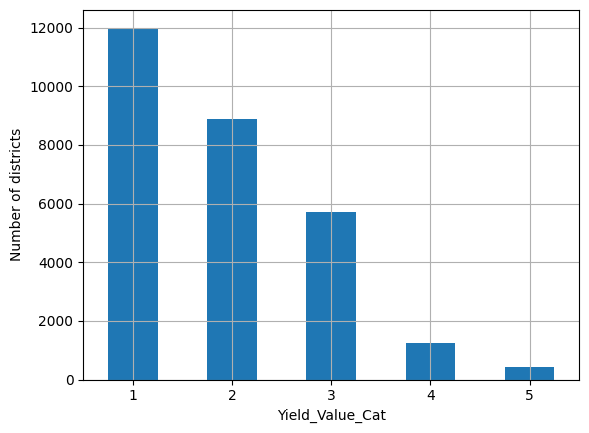

In [24]:
import matplotlib.pyplot as plt
datacorr["Yield_Value_Cat"].value_counts().sort_index().plot.bar(rot=0,
grid=True)
plt.xlabel("Yield_Value_Cat")
plt.ylabel("Number of districts")
plt.show()

In [25]:
datacorr.head(7)

,Area,Item,Year,avg_temp,Pesticides_Value,average_rain,Yield_Value,Yield_Value_Cat
0,0,1,1990,16.37,121.0,1485.0,36613,2
1,0,3,1990,16.37,121.0,1485.0,66667,2
2,0,4,1990,16.37,121.0,1485.0,23333,1
3,0,5,1990,16.37,121.0,1485.0,12500,1
4,0,6,1990,16.37,121.0,1485.0,7000,1
5,0,8,1990,16.37,121.0,1485.0,30197,2
6,0,1,1991,15.36,121.0,1485.0,29068,1


Finding the optimal Outlier Treshold

In [26]:
import pandas as pd
import numpy as np

# Assuming datacorr is your DataFrame

def find_outlier_threshold(data, threshold_range):
    """
    Function to find the optimal outlier threshold within a given range.
    
    Parameters:
    - data: DataFrame containing your data
    - threshold_range: A tuple or list representing the range of thresholds to test
    
    Returns:
    - The optimal threshold
    """
    numerical_data = data.select_dtypes(include=np.number)  # Select only numerical columns
    
    best_threshold = None
    best_num_outliers = float('inf')  # Initialize with a high value
    
    for threshold in threshold_range:
        mean = numerical_data.mean()
        std_dev = numerical_data.std()
        
        outlier_mask = ((numerical_data - mean).abs() > threshold * std_dev)
        num_outliers = outlier_mask.sum().sum()  # Count total number of outliers
        
        if num_outliers < best_num_outliers:
            best_num_outliers = num_outliers
            best_threshold = threshold
    
    return best_threshold

# Define a range of thresholds to test
threshold_range = np.arange(1, 5, 0.1)

# Find the optimal threshold
optimal_threshold = find_outlier_threshold(datacorr, threshold_range)

print("Optimal outlier threshold:", optimal_threshold)


Optimal outlier threshold: 4.900000000000004


Removing the DataOutliers from the dataframe 

In [27]:
import pandas as pd
import numpy as np

# Assuming datacorr is your DataFrame
# Convert the categorical column to numeric using its category codes
datacorr['Yield_Value_Cat'] = datacorr['Yield_Value_Cat'].astype('category').cat.codes

# Define your criterion for outliers, for example, values beyond 5 standard deviations from the mean
outlier_threshold = 5

# Calculate the mean and standard deviation of your DataFrame
mean = datacorr['Yield_Value_Cat'].mean()
std_dev = datacorr['Yield_Value_Cat'].std()

# Define a boolean mask for outliers
outlier_mask = ((datacorr['Yield_Value_Cat'] - mean).abs() > outlier_threshold * std_dev)

# Filter the DataFrame to remove outliers
data_no_outliers = datacorr[~outlier_mask]


In [28]:
data_no_outliers.head(7)

,Area,Item,Year,avg_temp,Pesticides_Value,average_rain,Yield_Value,Yield_Value_Cat
0,0,1,1990,16.37,121.0,1485.0,36613,1
1,0,3,1990,16.37,121.0,1485.0,66667,1
2,0,4,1990,16.37,121.0,1485.0,23333,0
3,0,5,1990,16.37,121.0,1485.0,12500,0
4,0,6,1990,16.37,121.0,1485.0,7000,0
5,0,8,1990,16.37,121.0,1485.0,30197,1
6,0,1,1991,15.36,121.0,1485.0,29068,0


In [29]:
data_no_outliers.shape

(28242, 8)

In [30]:
# Assuming data_no_outliers is your DataFrame
value_counts = data_no_outliers['Yield_Value_Cat'].value_counts()

# Check if all values are balanced
is_balanced = all(count == value_counts.iloc[0] for count in value_counts)

print("Are all values balanced?:", is_balanced)


Are all values balanced?: False


In [31]:
from imblearn.over_sampling import RandomOverSampler

# Assuming data_no_outliers is your DataFrame
X = data_no_outliers.drop("Yield_Value_Cat", axis=1)
y = data_no_outliers["Yield_Value_Cat"]

# Instantiate the RandomOverSampler
oversampler = RandomOverSampler(random_state=1812)

# Fit and transform the data to balance the classes
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Create a new DataFrame with the balanced data
datacorr = pd.concat([X_resampled, y_resampled], axis=1)

# Check the balanced counts of each class
balanced_counts = datacorr['Yield_Value_Cat'].value_counts()
print("Balanced class counts:")
print(balanced_counts)


Balanced class counts:
Yield_Value_Cat
1    12000
0    12000
2    12000
3    12000
4    12000
Name: count, dtype: int64


In [32]:
datacorr.shape

(60000, 8)

Finding the best value for the random_state

In [33]:
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Generate a sample dataset for demonstration purposes (replace with your actual data)
X, y = make_classification(
    n_samples=1000, 
    n_features=10, 
    n_informative=3,  # Adjusted number of informative features
    n_classes=3, 
    n_clusters_per_class=1,  # Set to 1 for multi-class classification
    random_state=0
)

# Define a list of random_state values to test
random_state_values = [0, 42, 123, 456, 789]

# Initialize variables to store best random_state and corresponding mean cross-validation score
best_random_state = None
best_cv_score = 0.0  # Initialize with a low value

# Iterate over each random_state value
for random_state in random_state_values:
    # Initialize your model (Logistic Regression for multi-class classification)
    model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs', random_state=random_state)
    
    # Perform cross-validation using current model
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    
    # Calculate mean cross-validation score
    mean_cv_score = cv_scores.mean()
    
    # Check if the current random_state gives a better mean cross-validation score
    if mean_cv_score > best_cv_score:
        best_cv_score = mean_cv_score
        best_random_state = random_state

print("Best random_state for cross-validation:", best_random_state)
print("Best mean cross-validation score:", best_cv_score)


Best random_state for cross-validation: 0
Best mean cross-validation score: 0.9729999999999999


Splitting the dataset 

In [34]:
from sklearn.model_selection import train_test_split
strat_train_set, strat_test_set = train_test_split(
datacorr, test_size=0.4, stratify=datacorr["Yield_Value_Cat"],random_state=0)

In [35]:
strat_test_set["Yield_Value_Cat"].value_counts()/len(strat_test_set)

Yield_Value_Cat
1    0.2
4    0.2
3    0.2
2    0.2
0    0.2
Name: count, dtype: float64

In [36]:
train_set, test_set = train_test_split(datacorr, test_size=0.4,random_state=0)

In [37]:
test_set["Yield_Value_Cat"].value_counts()/len(test_set)

Yield_Value_Cat
3    0.202833
0    0.200125
2    0.200042
4    0.199250
1    0.197750
Name: count, dtype: float64

In [38]:
datacorr["Yield_Value_Cat"].value_counts()/len(datacorr)

Yield_Value_Cat
1    0.2
0    0.2
2    0.2
3    0.2
4    0.2
Name: count, dtype: float64

Performing MLP and KNN CLassification

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Splitting the dataset into features (X) and target variable (y)
X = datacorr.drop("Yield_Value_Cat", axis=1)  # Features
y = datacorr["Yield_Value_Cat"]  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=1812)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# MLP Classifier
mlp_classifier = MLPClassifier(random_state=0)
mlp_classifier.fit(X_train_scaled, y_train)
y_pred_mlp = mlp_classifier.predict(X_test_scaled)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp, average='weighted')
recall_mlp = recall_score(y_test, y_pred_mlp, average='weighted')
f1_mlp = f1_score(y_test, y_pred_mlp, average='weighted')

# KNN Classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_scaled, y_train)
y_pred_knn = knn_classifier.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')

# Creating DataFrame for results
results_df = pd.DataFrame({
    'Classifier': ['MLP Classifier', 'KNN Classifier'],
    'Accuracy': [accuracy_mlp, accuracy_knn],
    'Precision': [precision_mlp, precision_knn],
    'Recall': [recall_mlp, recall_knn],
    'F1 Score': [f1_mlp, f1_knn]
})

# Displaying the results DataFrame
results_df


C:\Users\nossa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Classifier,Accuracy,Precision,Recall,F1 Score
0,MLP Classifier,0.995125,0.995165,0.995125,0.995128
1,KNN Classifier,0.970583,0.970616,0.970583,0.970564


**A2**

In [41]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.stats import uniform
import pandas as pd

# Splitting the dataset into features (X) and target variable (y)
X = datacorr.drop("Yield_Value_Cat", axis=1)  # Features
y = datacorr["Yield_Value_Cat"]  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=0)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define parameter grid for RandomizedSearchCV
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': uniform(0.0001, 0.001)
}

# Perform RandomizedSearchCV for MLPClassifier
mlp_random_search = RandomizedSearchCV(
    MLPClassifier(random_state=0),
    param_distributions=param_grid,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=0,
    verbose=1,
    n_jobs=-1
)
mlp_random_search.fit(X_train_scaled, y_train)

# Get best MLPClassifier
best_mlp = mlp_random_search.best_estimator_

# Evaluate the best MLPClassifier
y_pred_mlp = best_mlp.predict(X_test_scaled)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp, average='weighted')
recall_mlp = recall_score(y_test, y_pred_mlp, average='weighted')
f1_mlp = f1_score(y_test, y_pred_mlp, average='weighted')

# Create DataFrame for results
results_df = pd.DataFrame({
    'Classifier': ['Best MLP Classifier'],
    'Accuracy': [accuracy_mlp],
    'Precision': [precision_mlp],
    'Recall': [recall_mlp],
    'F1 Score': [f1_mlp]
})

# Display the results DataFrame
results_df


Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\nossa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Classifier,Accuracy,Precision,Recall,F1 Score
0,Best MLP Classifier,0.994125,0.99415,0.994125,0.994124


**A3**

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import pandas as pd

# Splitting the dataset into features (X) and target variable (y)
X = datacorr.drop("Yield_Value_Cat", axis=1)  # Features
y = datacorr["Yield_Value_Cat"]  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, stratify=y, random_state=0)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define classifiers
classifiers = {
    'SVM': SVC(random_state=1812),
    'Decision Tree': DecisionTreeClassifier(random_state=0),
    'Random Forest': RandomForestClassifier(random_state=0),
    'AdaBoost': AdaBoostClassifier(random_state=0),
    'XGBoost': XGBClassifier(random_state=0),
    'CatBoost': CatBoostClassifier(random_state=0, verbose=0),
    'Naïve-Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'MLP': MLPClassifier(random_state=0)
}

# Results storage
results = []

# Training and evaluating each classifier
for name, classifier in classifiers.items():
    try:
        classifier.fit(X_train_scaled, y_train)
        y_pred = classifier.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        results.append((name, accuracy, precision, recall, f1))
    except AttributeError:
        print(f"{name} does not support predict method.")

# Creating DataFrame for results
results_df = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Displaying the results DataFrame
results_df


C:\Users\nossa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\nossa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nossa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Classifier,Accuracy,Precision,Recall,F1 Score
0,SVM,0.970292,0.970293,0.970292,0.970191
1,Decision Tree,1.000000,1.000000,1.000000,1.000000
2,Random Forest,0.999917,0.999917,0.999917,0.999917
3,AdaBoost,0.600000,0.466667,0.600000,0.500000
4,XGBoost,0.998875,0.998875,0.998875,0.998875
5,CatBoost,0.999042,0.999042,0.999042,0.999042
6,Naïve-Bayes,0.932792,0.933878,0.932792,0.932898
7,KNN,0.968708,0.968660,0.968708,0.968658
8,MLP,0.994292,0.994325,0.994292,0.994291
